In [23]:
# import libraries and define global settings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     


# Exe: 1

In [3]:
X = np.random.normal(0,np.sqrt(2),size=10000)

# report the mean and variance
print(f'Empirical mean = {np.mean(X):.3f}')
print(f'Empirical variance = {np.var(X,ddof=1):.3f}')

Empirical mean = -0.018
Empirical variance = 2.011


In [4]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,n in enumerate(Ns):

  # generate random data
  X = np.random.normal(0,np.sqrt(2),size=n)
  
  # compute mean and variance
  means[i] = np.mean(X)
  vars[i]  = np.var(X,ddof=1)

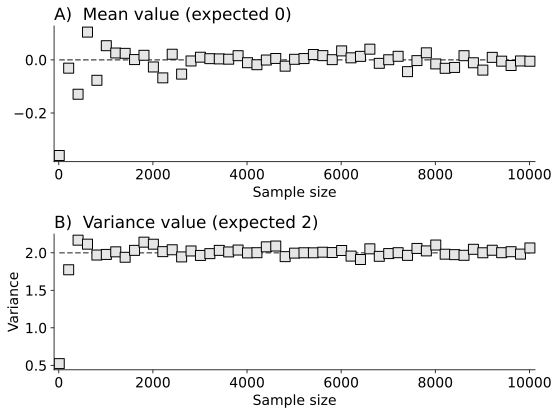

In [5]:
# plot
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size')
axs[0].set_title(r'A)  Mean value (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[2,2],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Variance')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'B)  Variance value (expected 2)',loc='left')


# display the figure
plt.tight_layout()
plt.show()

# Exe 2

In [6]:
# uniform data with boundaries [-3,8]
a,b = -3,8
Y = np.random.uniform(a,b,size=1324)

# compute mean and variance discrepancies
meanDiff = np.mean(Y) - (a+b)/2
varDiff  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2

# print the results
print(f'Mean discrepancy (signed): {meanDiff:.3f}')
print(f'Variance discrepancy (squared): {varDiff:.3f}')




Mean discrepancy (signed): -0.000
Variance discrepancy (squared): 0.018


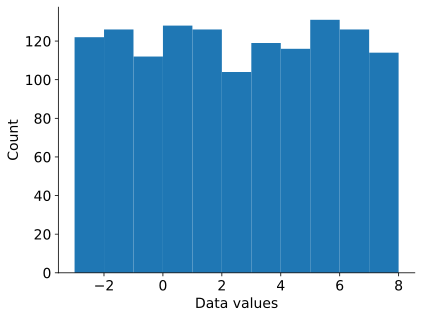

In [7]:
# histogram
plt.hist(Y,bins='fd')
plt.xlabel('Data values')
plt.ylabel('Count')
plt.show()
     

In [8]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,N in enumerate(Ns):

  # generate random data (sorting to ensure a>b)
  a,b = np.sort( np.random.randint(-3,11,2) )
  Y = np.random.uniform(a,b,size=N)

  # compute mean and variance discrepancies
  means[i] = np.mean(Y) - (a+b)/2
  vars[i]  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2

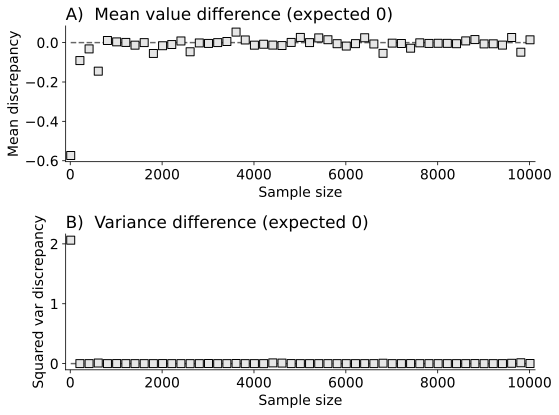

In [9]:
# plot 
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size',ylabel='Mean discrepancy')
axs[0].set_title(r'A)  Mean value difference (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Squared var discrepancy')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'B)  Variance difference (expected 0)',loc='left')


# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [10]:
# parameters
mu = 2
sigma = 1.5

# normally distributed numbers
normal = np.random.normal(0,1,size=10000)

# transform to log-normal
lognorm = np.exp(normal*sigma + mu)

# compute the empirical mean
empMean = np.mean(lognorm)

# and back-transform
empMeanInv = np.log(empMean) - sigma**2/2

# report the mean and its transform
print(f'Mean of log-normal data is {empMean:.3f}')
print(f'Transformed mean of log-normal data is {empMeanInv:.3f}')

Mean of log-normal data is 22.300
Transformed mean of log-normal data is 1.980


In [11]:
mus = np.linspace(1,10,13)

means = np.zeros(len(mus))

for i,m in enumerate(mus):

  # normally distributed data
  normal = np.random.randn(10000)*sigma + m

  # transform to log-normal
  lognorm = np.exp(normal)

  # empirical mean
  means[i] = np.mean( lognorm )

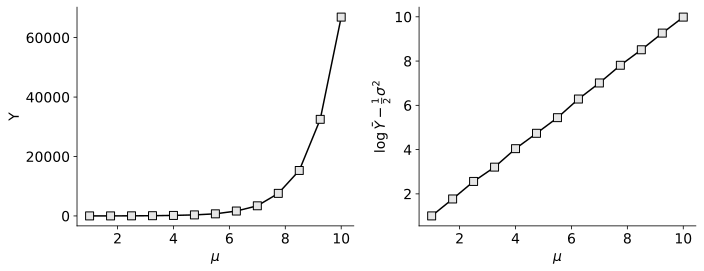

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(mus,means,'ks-',markerfacecolor=(.9,.9,.9),markersize=8)
axs[0].set(xlabel=r'$\mu$',ylabel=r'Y')

axs[1].plot(mus,np.log(means)-sigma**2/2,'ks-',markerfacecolor=(.9,.9,.9),markersize=8)
axs[1].set(xlabel=r'$\mu$',ylabel=r'$\log{\bar{Y}} - \frac{1}{2}\sigma^2$')

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [13]:
a,b = np.sort( np.random.randint(-3,11,2) )
N = 1001
Y = np.random.uniform(a,b,size=N)

# means acc to the formulas
mu_a = np.sqrt(3)*np.std(Y,ddof=1) + a
mu_b = b - np.sqrt(3)*np.std(Y,ddof=1)

# print
print(f'mu from a : {mu_a:.4f}')
print(f'mu from b : {mu_b:.4f}')
print(f'mean(Y)   : {np.mean(Y):.4f}')
print(f'avg bounds: {(a+b)/2:.4f}')

mu from a : 1.5027
mu from b : 1.4973
mean(Y)   : 1.5187
avg bounds: 1.5000


In [14]:
# stds acc to the formulas
sig_a = (np.mean(Y)-a)/np.sqrt(3)
sig_b = (b-np.mean(Y))/np.sqrt(3)

print(f'sigma from a : {sig_a:.4f}')
print(f'sigma from b : {sig_a:.4f}')
print(f'std(Y)       : {np.std(Y,ddof=1):.4f}')

sigma from a : 0.2995
sigma from b : 0.2995
std(Y)       : 0.2902


In [15]:
# to simulate data from mu/sigma parameters

# desired parameters
mu = 3.5
sig = 1.8

# generate the data
U = np.random.uniform(0,1,size=100000)
Y = mu + np.sqrt(3)*sig*(2*U-1)

print(f'Empirical mean: {np.mean(Y):.3f}')
print(f'Empirical std : {np.std(Y,ddof=1):.3f}')

Empirical mean: 3.509
Empirical std : 1.800


# Exe 6

# Exe 7

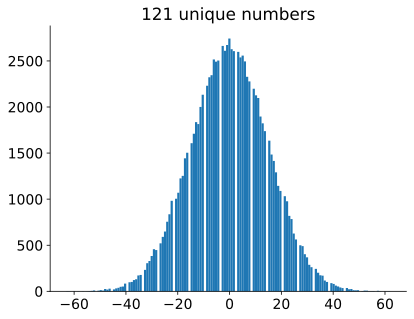

In [19]:
# create an normally distributed integer dataset from a standard normal

# rounding a normal with larger sigma
X = np.random.normal(loc=0,scale=15,size=100000)
X = np.round(X)

# the histogram looks better
plt.hist(X,bins='fd')
plt.title(f'{len(np.unique(X))} unique numbers',loc='center')
plt.show()

# Exe 8

In [20]:
N = 100

# create the data matrix
M = np.random.randn(N,2)
M[:,1] += M[:,0]

# correlation coefficient
r_real = np.corrcoef(M.T)[1,0]
     


In [21]:
# shuffle the data
ridx = np.random.permutation(N)

# copy the data
Mshuf = M.copy()
Mshuf[:,0] = Mshuf[ridx,0]

# new correlation
r_shuf = np.corrcoef(Mshuf.T)[1,0]

# real and shuffled correlation coefficients
print(f'Real correlation     r = {r_real:.3f}')
print(f'Shuffled correlation r = {r_shuf:.3f}')
     

Real correlation     r = 0.769
Shuffled correlation r = -0.010


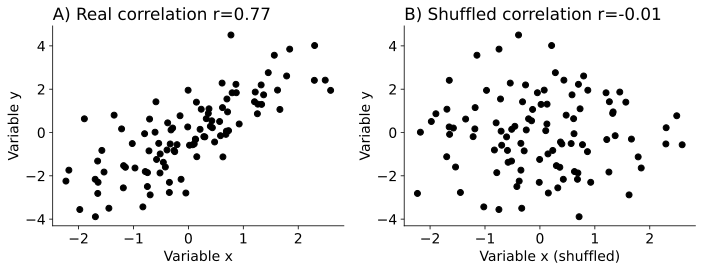

In [22]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(M[:,0],M[:,1],'ko')
axs[0].set(xlabel='Variable x',ylabel='Variable y')
axs[0].set_title(f'A) Real correlation r={r_real:.2f}')

axs[1].plot(Mshuf[:,0],Mshuf[:,1],'ko')
axs[1].set(xlabel='Variable x (shuffled)',ylabel='Variable y')
axs[1].set_title(f'B) Shuffled correlation r={r_shuf:.2f}')


plt.tight_layout()
plt.show()
     

# Exe 9

In [24]:
# sample size
N = 3000

# generate data from a Laplace distribution
data = stats.laplace.rvs(size=N)

# descriptives
mean = np.mean(data)
std  = np.std(data,ddof=1)

# histograms via numpy
yy,xx = np.histogram(data,bins='fd')
xx = (xx[:-1]+xx[1:])/2

# find bars within 1 std of the mean
closeBars = np.logical_and(xx>(mean-std), xx<(mean+std))

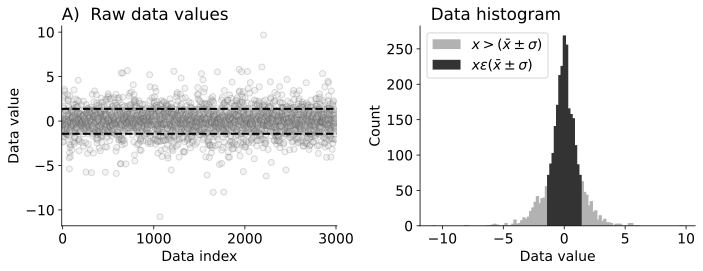

In [30]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

# scatter plot of the data
axs[0].plot(data,'o',color=(.3,.3,.3),markerfacecolor=(.8,.8,.8),alpha=.2)
axs[0].axhline(mean-std,linestyle='--',linewidth=2,color='k')
axs[0].axhline(mean+std,linestyle='--',linewidth=2,color='k')

axs[0].set(xlabel='Data index',ylabel='Data value',xlim=[-10,len(data)+10])
axs[0].set_title(r'A)  Raw data values')

# show the histogram
axs[1].bar(xx[~closeBars],yy[~closeBars],width=30/len(xx),color=(.7,.7,.7),edgecolor=None,label=r'$x > (\bar{x} \pm \sigma)$')
axs[1].bar(xx[closeBars],yy[closeBars],width=30/len(xx),color=(.2,.2,.2),edgecolor=None,label=r'$x \epsilon (\bar{x} \pm \sigma)$')

axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].legend()
axs[1].set_title(r'  Data histogram')


# display the figure
plt.tight_layout()
plt.show()